In [1]:
import math

# Sample 2D dataset
data = [
    [1, 2],
    [2, 3],
    [5, 8],
    [8, 8],
    [1, 0]
]

# Euclidean distance between two points
def euclidean(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# Linkage methods
def single_linkage(c1, c2):
    return min(euclidean(p1, p2) for p1 in c1 for p2 in c2)

def complete_linkage(c1, c2):
    return max(euclidean(p1, p2) for p1 in c1 for p2 in c2)

def average_linkage(c1, c2):
    distances = [euclidean(p1, p2) for p1 in c1 for p2 in c2]
    return sum(distances) / len(distances)

# Agglomerative clustering
def agglomerative_clustering(data, linkage_type="single"):
    clusters = [[point] for point in data]  # each point starts as its own cluster
    step = 1

    while len(clusters) > 1:
        min_dist = float('inf')
        pair_to_merge = (0, 1)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if linkage_type == "single":
                    dist = single_linkage(clusters[i], clusters[j])
                elif linkage_type == "complete":
                    dist = complete_linkage(clusters[i], clusters[j])
                elif linkage_type == "average":
                    dist = average_linkage(clusters[i], clusters[j])
                else:
                    raise ValueError("Invalid linkage type")

                if dist < min_dist:
                    min_dist = dist
                    pair_to_merge = (i, j)

        # Merge the closest pair
        i, j = pair_to_merge
        new_cluster = clusters[i] + clusters[j]
        clusters.pop(j)
        clusters.pop(i)
        clusters.append(new_cluster)

        print(f"Step {step}: Merged clusters {i} and {j} -> {new_cluster}")
        step += 1

# Run the algorithm with different linkage types
print("=== SINGLE LINKAGE ===")
agglomerative_clustering(data, "single")

print("\n=== COMPLETE LINKAGE ===")
agglomerative_clustering(data, "complete")

print("\n=== AVERAGE LINKAGE ===")
agglomerative_clustering(data, "average")

=== SINGLE LINKAGE ===
Step 1: Merged clusters 0 and 1 -> [[1, 2], [2, 3]]
Step 2: Merged clusters 2 and 3 -> [[1, 0], [1, 2], [2, 3]]
Step 3: Merged clusters 0 and 1 -> [[5, 8], [8, 8]]
Step 4: Merged clusters 0 and 1 -> [[1, 0], [1, 2], [2, 3], [5, 8], [8, 8]]

=== COMPLETE LINKAGE ===
Step 1: Merged clusters 0 and 1 -> [[1, 2], [2, 3]]
Step 2: Merged clusters 0 and 1 -> [[5, 8], [8, 8]]
Step 3: Merged clusters 0 and 1 -> [[1, 0], [1, 2], [2, 3]]
Step 4: Merged clusters 0 and 1 -> [[5, 8], [8, 8], [1, 0], [1, 2], [2, 3]]

=== AVERAGE LINKAGE ===
Step 1: Merged clusters 0 and 1 -> [[1, 2], [2, 3]]
Step 2: Merged clusters 2 and 3 -> [[1, 0], [1, 2], [2, 3]]
Step 3: Merged clusters 0 and 1 -> [[5, 8], [8, 8]]
Step 4: Merged clusters 0 and 1 -> [[1, 0], [1, 2], [2, 3], [5, 8], [8, 8]]



--- SINGLE LINKAGE ---


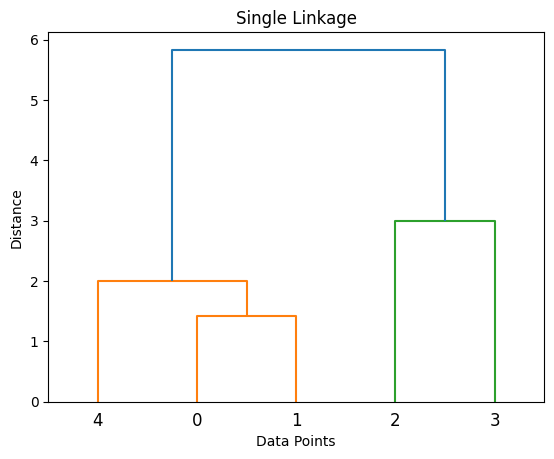


--- COMPLETE LINKAGE ---


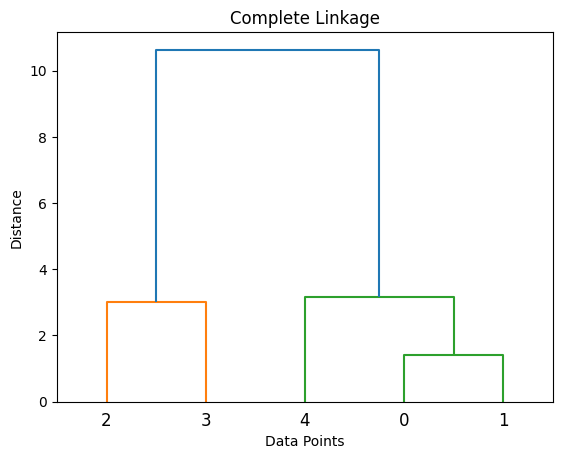


--- AVERAGE LINKAGE ---


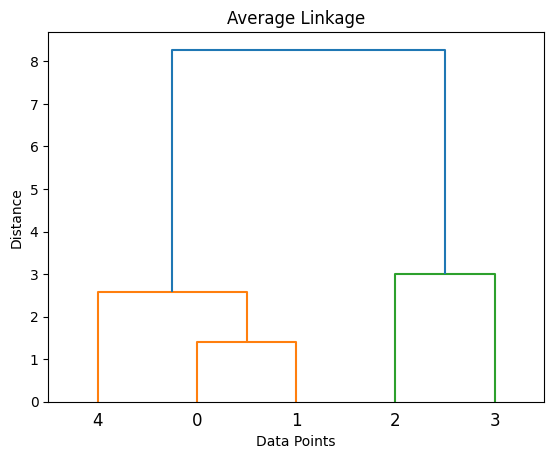

In [20]:
import math
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

data = [[1, 2], [2, 3], [5, 8], [8, 8], [1, 0]]

def dist(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def calc_distance(c1, c2, method):
    distances = [dist(i, j) for i in c1 for j in c2]
    if method == "single":
        return min(distances)
    elif method == "complete":
        return max(distances)
    elif method == "average":
        return sum(distances) / len(distances)

# Agglomerative clustering
def agglomerative(data, method):
    clusters = [[i] for i in range(len(data))]  
    history = []
    cluster_data = {i: [data[i]] for i in range(len(data))}
    next_cluster_id = len(data)

    while len(clusters) > 1:
        min_dist = float('inf')
        to_merge = (0, 1)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                ci = sum([cluster_data[idx] for idx in clusters[i]], [])
                cj = sum([cluster_data[idx] for idx in clusters[j]], [])
                d = calc_distance(ci, cj, method)
                if d < min_dist:
                    min_dist = d
                    to_merge = (i, j)

        i, j = to_merge
        c1 = clusters[i]
        c2 = clusters[j]
        new_cluster = c1 + c2

        history.append([c1[0], c2[0], min_dist, len(new_cluster)])

        clusters = [clusters[k] for k in range(len(clusters)) if k != i and k != j]
        clusters.append([next_cluster_id])
        cluster_data[next_cluster_id] = sum([cluster_data[idx] for idx in new_cluster], [])
        next_cluster_id += 1

        

    return np.array(history)

# Dendrogram plotting
def draw_dendrogram(history, title):
    plt.figure()
    dendrogram(history, labels=[str(i) for i in range(len(data))])
    plt.title(title)
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

for method in ["single", "complete", "average"]:
    print(f"\n--- {method.upper()} LINKAGE ---")
    result = agglomerative(data, method)
    draw_dendrogram(result, f"{method.capitalize()} Linkage")


In [15]:
import math

# Sample 2D dataset
data = [
    [1, 2],
    [2, 3],
    [5, 8],
    [8, 8],
    [1, 0]
]

def eucledian(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
def single_link(c1,c2):
    return min(eucledian(p1,p2) for p1 in c1 for p2 in c2)

def complete_link(c1,c2):
    return min(eucledian(p1,p2) for p1 in c1 for p2 in c2)

def average_link(c1,c2):
    distances = [eucledian(p1,p2) for p1 in c1 for p2 in c2]
    return sum(distances)/len(distances)

average_link([[1,2]],[[2,3]])

def agglomerative(data, method = "single"):
    clusters = [[i] for i in data]
    step = 1

    while len(clusters)>1:
        min_dist = float('inf')
        pair_to_merge = (0,1)

        for i in range (len(clusters)):
            for j in range(i+1, len(clusters)):
                if method == "single":
                    dist = single_link(clusters[i],clusters[j])
                    
                if dist < min_dist:
                    min_dist = dist
                    pair_to_merge = (i,j)

        i,j = pair_to_merge
        new_cluster = clusters[i]+clusters[j]
        clusters.pop(j)
        clusters.pop(i)
        clusters.append(new_cluster)

        print(f"Step {step}: Merged clusters {i} and {j} -> {new_cluster}")
        step += 1

print("=== SINGLE LINKAGE ===")
agglomerative(data, "single")
        



=== SINGLE LINKAGE ===
Step 1: Merged clusters 0 and 1 -> [[1, 2], [2, 3]]
Step 2: Merged clusters 2 and 3 -> [[1, 0], [1, 2], [2, 3]]
Step 3: Merged clusters 0 and 1 -> [[5, 8], [8, 8]]
Step 4: Merged clusters 0 and 1 -> [[1, 0], [1, 2], [2, 3], [5, 8], [8, 8]]


In [ ]:
import math

# Sample 2D dataset
data = [
    [1, 2],
    [2, 3],
    [5, 8],
    [8, 8],
    [1, 0]
]

def eucledian(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def single_link(c1, c2):
    return min(eucledian(p1, p2) for p1 in c1 for p2 in c2)

def complete_link(c1, c2):
    return max(eucledian(p1, p2) for p1 in c1 for p2 in c2)  # also fixed from min to max

def average_link(c1, c2):
    distances = [eucledian(p1, p2) for p1 in c1 for p2 in c2]
    return sum(distances) / len(distances)

# Example call with proper clusters
print(average_link([[1, 2]], [[2, 3]]))  # ✅ Corrected input
